In [1]:
import pandas as pd

# Carregar a base de dados
df = pd.read_csv('frigos_base.csv')

In [2]:
# Exibir as primeiras linhas do dataframe para conferir a estrutura
print(df.head())

         Data    Produto  Quantidade_Vendida  Preço_Unitário  Total_Venda  \
0  2023-08-26      suína                  43           16.01      2635.03   
1  2023-08-26     bovina                   1           38.26       640.20   
2  2024-05-15  embutidos                  43           36.56      4189.18   
3  2023-11-06      suína                   1           47.41      3067.46   
4  2024-03-24      suína                  67           46.75      3403.60   

                           Cliente      Região  
0  Stephenson, Watkins and Roberts    Delaware  
1                      Reed-Wright    Kentucky  
2                     Rhodes Group  Washington  
3                   Lynch-Jacobson     Arizona  
4      Hoffman, Malone and Edwards     Montana  


In [3]:
# 1. Limpeza de Dados
# Verificar e remover dados ausentes
df.isnull().sum()  # Checar valores ausentes

Data                  0
Produto               0
Quantidade_Vendida    0
Preço_Unitário        0
Total_Venda           0
Cliente               0
Região                0
dtype: int64

In [4]:
# Substituir valores ausentes ou eliminar linhas, se necessário
df = df.dropna()  # Ou df.fillna(0) para preencher valores ausentes com zero

In [6]:
# 2. Processamento de Dados
# Converter a coluna 'Data da Venda' para datetime
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')

In [7]:
# Calcular o total de vendas por categoria
total_vendas_categoria = df.groupby('Produto')['Total_Venda'].sum()

In [8]:
# Calcular o total de vendas por região
total_vendas_regiao = df.groupby('Região')['Total_Venda'].sum()

In [9]:
# Calcular o total de vendas mensalmente
df['Ano-Mês'] = df['Data'].dt.to_period('M')
total_vendas_mensal = df.groupby('Ano-Mês')['Total_Venda'].sum()

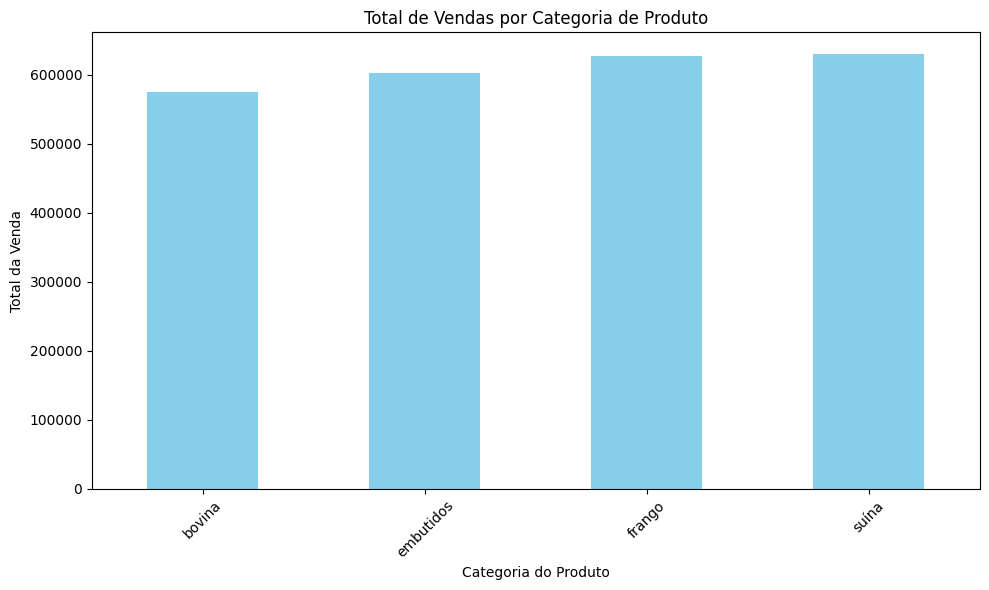

In [10]:

# Visualização
import matplotlib.pyplot as plt

# Gráfico de Total de Vendas por Categoria
plt.figure(figsize=(10, 6))
total_vendas_categoria.plot(kind='bar', color='skyblue')
plt.title('Total de Vendas por Categoria de Produto')
plt.xlabel('Categoria do Produto')
plt.ylabel('Total da Venda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('vendas_categoria.png')
plt.show()


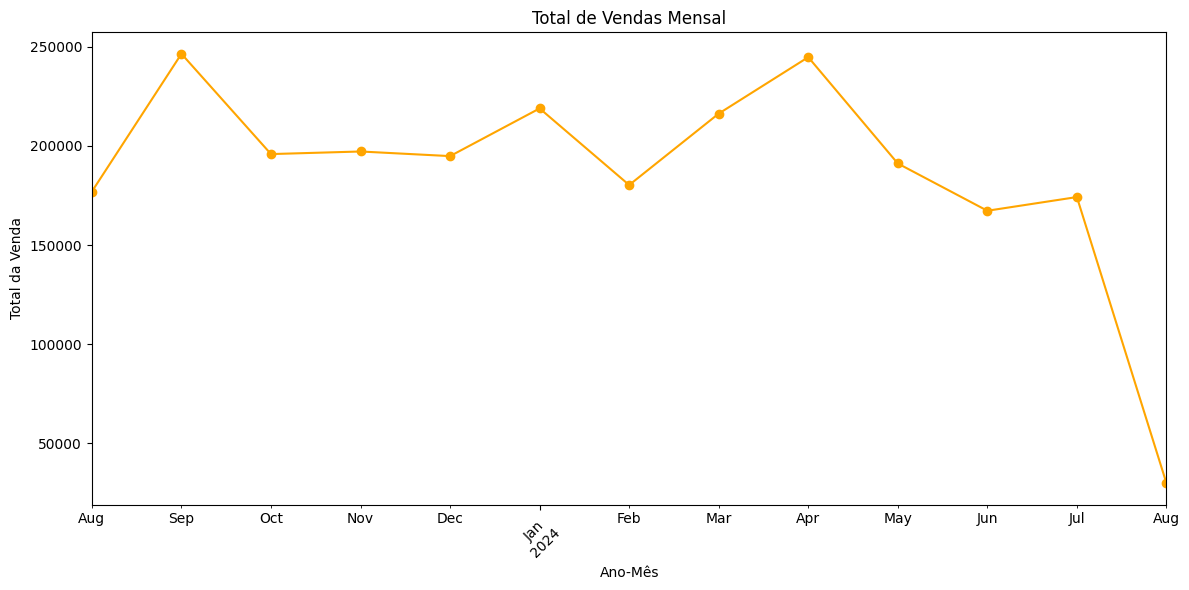

In [12]:
# Gráfico de Total de Vendas Mensal
plt.figure(figsize=(12, 6))
total_vendas_mensal.plot(kind='line', marker='o', color='orange')
plt.title('Total de Vendas Mensal')
plt.xlabel('Ano-Mês')
plt.ylabel('Total da Venda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('vendas_mensal.png')
plt.show()